In [1]:
import numpy as np
import gym
from gym import wrappers
import time
import sys
import matplotlib.pyplot as plt

In [2]:
def Frozen_Lake_Experiments(size):
    # 0 = left; 1 = down; 2 = right;  3 = up
    if size == 4:
        env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
    else:
        env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
    env = env.unwrapped
    desc = env.unwrapped.desc


    print('Q LEARNING WITH FROZEN LAKE')
    st = time.time()
    reward_array = []
    iter_array = []
    size_array = []
    chunks_array = []
    averages_array = []
    time_array = []
    Q_array = []
    for epsilon in [0.1,0.3,0.5,0.7,0.9]:
        print(epsilon, "hit")
        Q = np.zeros((env.observation_space.n, env.action_space.n))
        rewards = []
        iters = []
        optimal=[0]*env.observation_space.n
        alpha = 0.85
        gamma = 0.95
        episodes = 30000
        environment  = 'FrozenLake-v1'
        env = gym.make(environment)
        env = env.unwrapped
        desc = env.unwrapped.desc
        for episode in range(episodes):
            state = env.reset()[0]
            done = False
            t_reward = 0
            max_steps = 1000000
            for i in range(max_steps):
                if done:
                    break        
                current = state
                if np.random.rand() < (epsilon):
                    action = np.argmax(Q[current, :])
                else:
                    action = env.action_space.sample()
                
                state, reward, done, info, _ = env.step(action)
                t_reward += reward
                
                Q[current, action] += alpha * (reward + gamma * np.max(Q[state]) - Q[current, action])
            epsilon=(1-2.71**(-episode/1000))
            rewards.append(t_reward)
            iters.append(i)


        for k in range(env.observation_space.n):
            optimal[k]=np.argmax(Q[k, :])

        reward_array.append(rewards)
        iter_array.append(iters)
        Q_array.append(Q)

        env.close()
        end=time.time()
        #print("time :",end-st)
        time_array.append(end-st)

        # Plot results
        def chunk_list(l, n):
            for i in range(0, len(l), n):
                yield l[i:i + n]

        size = int(episodes / 50)
        chunks = list(chunk_list(rewards, size))
        averages = [sum(chunk) / len(chunk) for chunk in chunks]
        size_array.append(size)
        chunks_array.append(chunks)
        averages_array.append(averages)

    plt.plot(range(0, len(reward_array[0]), size_array[0]), averages_array[0],label='epsilon=0.1')
    plt.plot(range(0, len(reward_array[1]), size_array[1]), averages_array[1],label='epsilon=0.3')
    plt.plot(range(0, len(reward_array[2]), size_array[2]), averages_array[2],label='epsilon=0.5')
    plt.plot(range(0, len(reward_array[3]), size_array[3]), averages_array[3],label='epsilon=0.7')
    plt.plot(range(0, len(reward_array[4]), size_array[4]), averages_array[4],label='epsilon=0.9')
    plt.legend()
    plt.xlabel('Iterations')
    plt.grid()
    plt.title('Frozen Lake - Q Learning - Constant Epsilon')
    plt.ylabel('Average Reward')
    plt.show()

    plt.plot([0.1,0.3,0.5,0.7,0.9],time_array)
    plt.xlabel('Epsilon Values')
    plt.grid()
    plt.title('Frozen Lake - Q Learning')
    plt.ylabel('Execution Time (s)')
    plt.show()

    plt.subplot(1,6,1)
    plt.imshow(Q_array[0])
    plt.title('0.1')

    plt.subplot(1,6,2)
    plt.title('0.3')
    plt.imshow(Q_array[1])

    plt.subplot(1,6,3)
    plt.title('0.5')
    plt.imshow(Q_array[2])

    plt.subplot(1,6,4)
    plt.title('0.7')
    plt.imshow(Q_array[3])

    plt.subplot(1,6,5)
    plt.title('0.9')
    plt.imshow(Q_array[4])

    plt.show()


Q LEARNING WITH FROZEN LAKE
0.1 hit
0.3 hit
0.5 hit
0.7 hit
0.9 hit


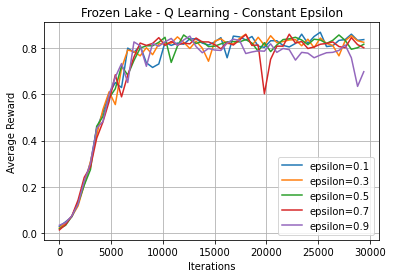

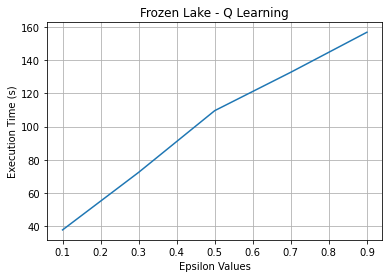

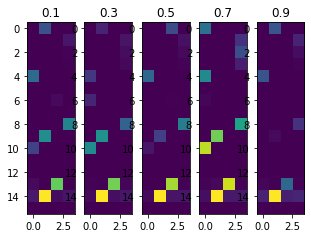

In [3]:
Frozen_Lake_Experiments(4)

Q LEARNING WITH FROZEN LAKE
0.1 hit
0.3 hit
0.5 hit
0.7 hit
0.9 hit


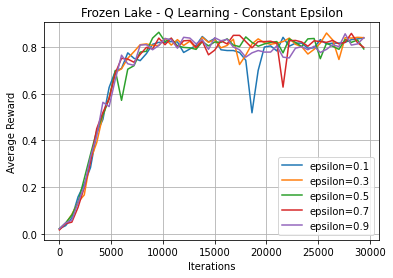

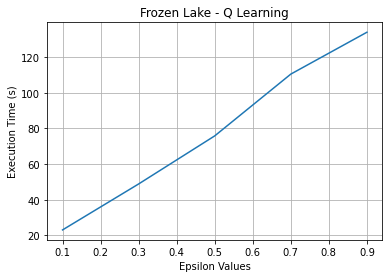

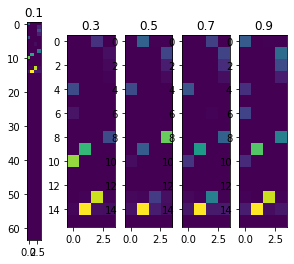

In [4]:
Frozen_Lake_Experiments(8)